# Guided Project: Building A Handwritten Digits Classifier

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data=load_digits()
data

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [2]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'images'])

In [3]:
labels = pd.Series(data['target'])

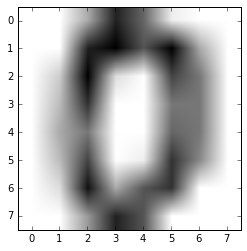

In [4]:
%matplotlib inline 

data_df=pd.DataFrame(data['data'])

first_image = data_df.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

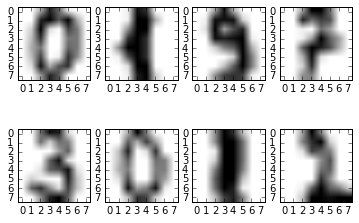

In [5]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data_df.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data_df.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data_df.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data_df.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data_df.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data_df.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data_df.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data_df.iloc[1299].values.reshape(8,8), cmap='gray_r')

## **K-Nearest Neighbors**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


def train(train_features,train_target,i):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_features,train_target)
    return knn

def test(test_features,test_target,model):
    predictions=model.predict(test_features)
    accuracy=accuracy_score(test_target,predictions)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(test_features,test_target,model)
        fold_accuracies.append(np.round(accuracy,2))
    return np.mean(fold_accuracies)   
        
        
list=[1,5,10,15,20]

results=[]
for i in list:
    results.append(cross_validate(i))
            

results

[0.9675, 0.96, 0.9525, 0.9525, 0.95]

# Neural Networks

1. **Single Hidden Layer**

In [7]:
from sklearn.neural_network import MLPClassifier

def train(train_features,train_target,i):
    mlp=MLPClassifier(hidden_layer_sizes=(i,))
    mlp.fit(train_features,train_target)
    return mlp

def test(test_features,test_target,model):
    predictions=model.predict(test_features)
    accuracy=sum(predictions==test_target)/len(test_target)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(test_features,test_target,model)
        fold_accuracies.append(accuracy)
    return np.round(np.mean(fold_accuracies),2)  
        
neurons=[8,16,32,64,128,256]
results=[]
for row in neurons:
    result=cross_validate(row)
    results.append(result)    
    print('N° Neurons: ',row,result)


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



N° Neurons:  8 0.85
N° Neurons:  16 0.92
N° Neurons:  32 0.93
N° Neurons:  64 0.93
N° Neurons:  128 0.95
N° Neurons:  256 0.96


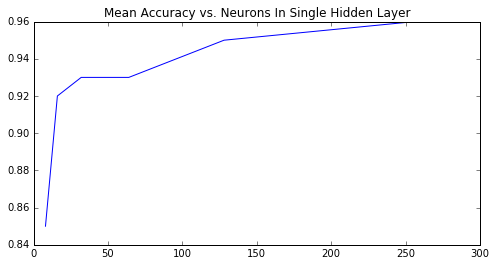

In [8]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

plt.plot(neurons, results)

We can see, that except for the 16 Neurons case, as we increase the N° of neurons, so does the model's accuracy.

1. a. Train vs Test accuracy

In [9]:
def train(train_features,train_target,i):
    mlp=MLPClassifier(hidden_layer_sizes=(i,))
    mlp.fit(train_features,train_target)
    return mlp

def test(train_features,train_target,model):
    predictions=model.predict(train_features)
    accuracy=sum(predictions==train_target)/len(train_target)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(train_features,train_target,model)
        fold_accuracies.append(accuracy)
    return np.round(np.mean(fold_accuracies),2)  
        
neurons=[8,16,32,64,128,256]
train_results=[]
for row in neurons:
    result_train=cross_validate(row)
    train_results.append(result_train)    
    print('N° Neurons:',row,': ',result_train)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



N° Neurons: 8 :  0.97
N° Neurons: 16 :  1.0
N° Neurons: 32 :  1.0
N° Neurons: 64 :  1.0
N° Neurons: 128 :  1.0
N° Neurons: 256 :  1.0


(0.84, 1.01)

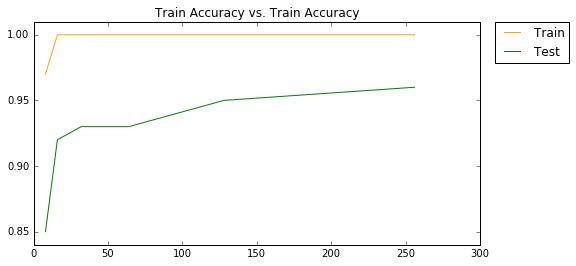

In [10]:
plt.figure(figsize=(8,4))
plt.title("Train Accuracy vs. Train Accuracy")
plt.plot(neurons, train_results,label='Train',color='orange')
plt.plot(neurons, results,label='Test',color='green')
plt.legend(bbox_to_anchor=(1.2,1), borderaxespad=0)
plt.ylim([0.84,1.01])

In the Neural Network single layer the accuracy of the model with lots of neurons (256) is about 95% which is less than 97% the accuracy that we have got from the k-neighbor classification algorithm. Neural Networks with a single layer gets very soon to 100% accuracy for the train data set but acts poorly for the test data set which is the sign of overfitting.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

2. **Two Hidden Layers**

In [11]:
def train(features,target,i):
    mlp=MLPClassifier(hidden_layer_sizes=(i,i))
    mlp.fit(features,target)
    return mlp

def test(features,target,model):
    predictions=model.predict(features)
    accuracy=sum(predictions==target)/len(target)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(test_features,test_target,model)
        fold_accuracies.append(accuracy)
    return np.round(np.mean(fold_accuracies),2)  


neurons=[64,128,256]
test_predictions_two_layers=[]
for row in neurons:
    test_prediction=cross_validate(row)
    test_predictions_two_layers.append(test_prediction)
    print('N° Neurons',row,': ',test_prediction)

N° Neurons 64 :  0.94
N° Neurons 128 :  0.95
N° Neurons 256 :  0.96


In [12]:
def train(features,target,i):
    mlp=MLPClassifier(hidden_layer_sizes=(i,i))
    mlp.fit(features,target)
    return mlp

def test(features,target,model):
    predictions=model.predict(features)
    accuracy=sum(predictions==target)/len(target)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(train_features,train_target,model)
        fold_accuracies.append(accuracy)
    return np.round(np.mean(fold_accuracies),2)  
        
train_prediction=cross_validate(64)
print('Two Hidden Layer Accuracy: ',train_prediction)

Two Hidden Layer Accuracy:  1.0


3. **Three Hidden Layers + 6 K folds**

In [13]:
def train(features,target,i):
    mlp=MLPClassifier(hidden_layer_sizes=(i,i,i))
    mlp.fit(features,target)
    return mlp

def test(features,target,model):
    predictions=model.predict(features)
    accuracy=sum(predictions==target)/len(target)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=6,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(test_features,test_target,model)
        fold_accuracies.append(accuracy)
    return np.round(np.mean(fold_accuracies),2)

neurons=[10,64,128,256]
three_layer=[]

for row in neurons:
    test_predictions=cross_validate(row)
    three_layer.append(test_predictions)
    print('N° Neurons',row,': ',test_predictions)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



N° Neurons 10 :  0.89
N° Neurons 64 :  0.96
N° Neurons 128 :  0.95
N° Neurons 256 :  0.97


In [14]:
def train(features,target,i):
    mlp=MLPClassifier(hidden_layer_sizes=(i,i,i))
    mlp.fit(features,target)
    return mlp

def test(features,target,model):
    predictions=model.predict(features)
    accuracy=sum(predictions==target)/len(target)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=6,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(train_features,train_target,model)
        fold_accuracies.append(accuracy)
    return np.round(np.mean(fold_accuracies),2)

neurons=[10,64,128,256]
three_layer_train=[]

for row in neurons:
    train_predictions=cross_validate(row)
    three_layer_train.append(train_predictions)
    print('N° Neurons',row,': ',train_predictions)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



N° Neurons 10 :  0.99
N° Neurons 64 :  1.0
N° Neurons 128 :  1.0
N° Neurons 256 :  1.0


(0.84, 1.01)

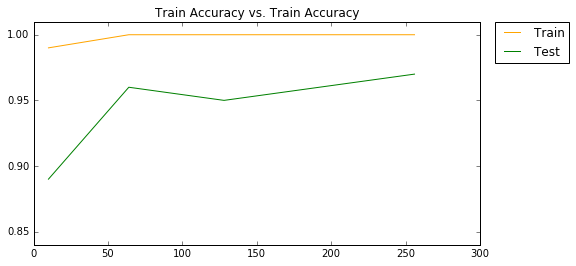

In [15]:
plt.figure(figsize=(8,4))
plt.title("Train Accuracy vs. Train Accuracy")
plt.plot(neurons, three_layer_train,label='Train',color='orange')
plt.plot(neurons, three_layer,label='Test',color='green')
plt.legend(bbox_to_anchor=(1.2,1), borderaxespad=0)
plt.ylim([0.84,1.01])

It seems Neural Networks with three hidden layers and using 6 fold cross validation improves the test set accuracy to 97%. It still seems overfitted.

## Visualization of MLP Weights on MNIST

Sometimes looking at the learned coefficients of a neural network can provide insight into the learning behavior. For example, if weights look unstructured, maybe some were not used at all, or if very large coefficients exist, maybe regularization was too low or the learning rate too high. Let's look at the visualized weights. I use this resource to implement it


[(64, 256), (256, 256), (256, 10)]
First layer:


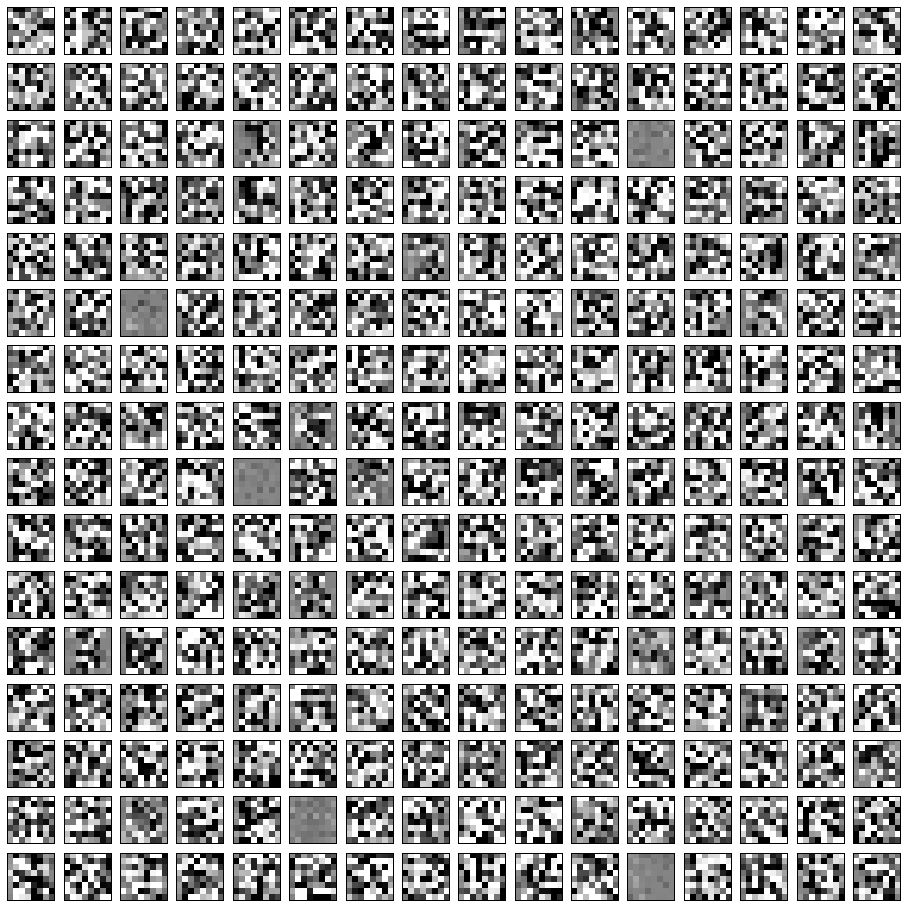

Second layer:


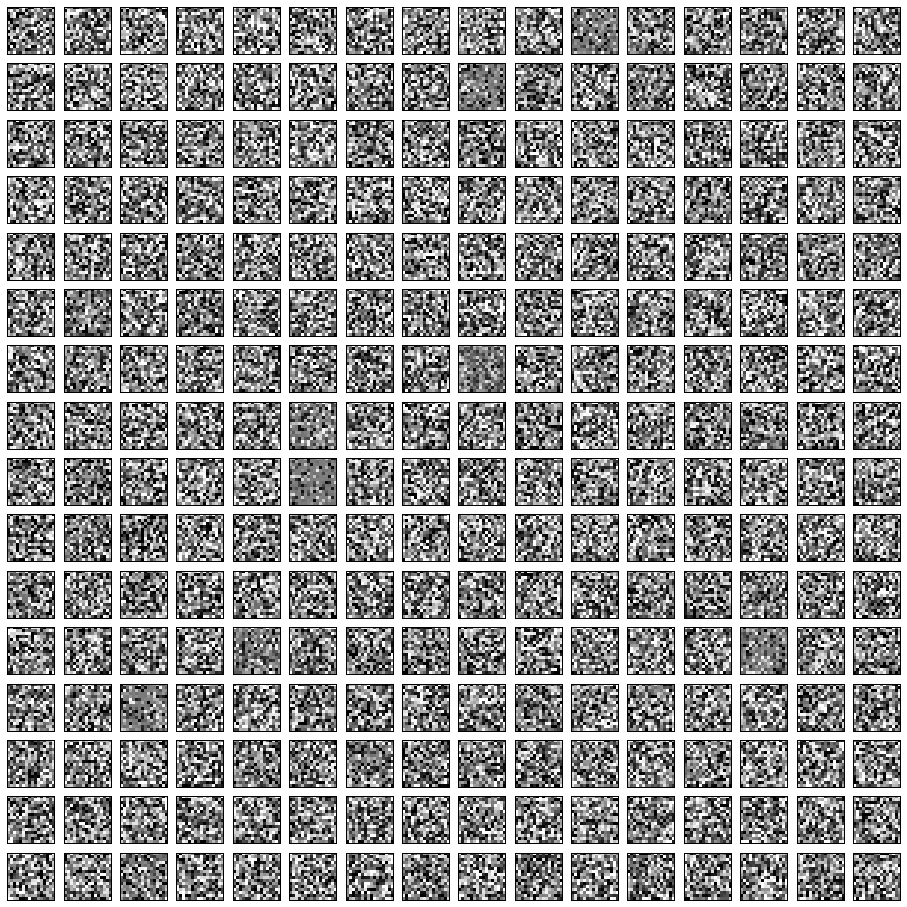

Output layer:


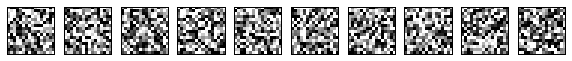

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.96,
  0.9766666666666667,
  0.9566666666666667,
  0.9698996655518395,
  0.9866220735785953,
  0.9331103678929766])

In [16]:
def visualize_nn_weights(coef, X_train, y_train, X_test, y_test, layer = 0):
    row = 16
    col = 16
    fig_size = (16, 16)
    if layer ==2:
        row = 1
        col = 10
        fig_size = (10, 36)
    fig, axes = plt.subplots(row, col, figsize=fig_size)
    # use global min / max to ensure all weights are shown on the same scale
    vmin, vmax = coef[layer].min(), coef[layer].max()
    for coef, ax in zip(coef[layer].T, axes.ravel()):
        if layer == 0:
            ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
                       vmax=.5 * vmax)
        else:
            ax.matshow(coef.reshape(16,16), cmap=plt.cm.gray, vmin=.5 * vmin,
                       vmax=.5 * vmax)
        
        ax.set_xticks(())
        ax.set_yticks(())

    plt.show()
    
def train_nn(neuron_arch, train_features, train_target):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch, random_state = 2)
    mlp.fit(train_features, train_target)
    return mlp
    
def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    train_result = pd.DataFrame()
    train_result['true_result'] = test_target
    train_result['prediction'] = predictions
    accuracy = sum(train_result["prediction"] == train_result["true_result"])/len(train_result)    
    return accuracy
 

def cross_validate(n_neurons, df, target, nsplits = 4, layer = 0):
    kf = KFold(n_splits=nsplits, random_state=2)
    train_accuracies = []
    test_accuracies = []
    coefs = []
    for train_index, test_index in kf.split(df):
        train_features, test_features = df.loc[train_index], df.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_nn(n_neurons, train_features, train_target)        
        coefs.append(model.coefs_)
        train_accuracy = test(model, train_features, train_target)
        test_accuracy = test(model, test_features, test_target)
        train_accuracies.append(train_accuracy) 
        test_accuracies.append(test_accuracy) 
    print("")
    print([coef.shape for coef in model.coefs_])
    print("First layer:")
    visualize_nn_weights(np.mean(coefs, axis = 0), train_features, train_target, test_features, test_target, 0)
    print("Second layer:")
    visualize_nn_weights(np.mean(coefs, axis = 0), train_features, train_target, test_features, test_target, 1)
    print("Output layer:")
    visualize_nn_weights(np.mean(coefs, axis = 0), train_features, train_target, test_features, test_target, 2)
    return train_accuracies, test_accuracies

cross_validate((256, 256), data_df, labels, 6, 1)


Quoting this article:

"The weights are useful to visualize because well-trained networks usually display nice and smooth filters without any noisy patterns. Noisy patterns can be an indicator of a network that hasn’t been trained for long enough, or possibly a very low regularization strength that may have led to overfitting."

No pattern can be seen in the visualized weights that can be another sign of overfitting and needs more improvement.